<h1><center>Movie Recommendation System - Exploratory  Data Analysis</center></h1>

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Cosine Similarity Calculation
- Ranking and Recommendations
- Deployment

<p> We Will Perform upto Exploratory Data Analysis in this Notebook <p>

### 1) Problem statement
- This project Creates a content-based movie recommendation system using cosine similarity to address the challenge of personalizing movie recommendations based on user preferences and rich movie attributes.


### 2) Data Collection

- The data consists of 7 columns and 6010 Records/Rows.

# 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('../Artifacts/main_data.csv')

In [3]:
df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...


### Shape of the Dataset

In [4]:
df.shape

(6010, 7)

# 2.2 Dataset Information

- Director_Name    :Movie director's name
- Actor_1_Name     : Primary lead actor/actress
- Actor_2_Name     : Secondary lead actor/actress
- Actor_3_Name     : Tertiary actor/actress
- Genres           : Movie's thematic categories
- Movie_Title      : Title of the movie
- Combined_Feature : Aggregate representation for recommendation

### 3). Data Checks to perform

- Checking Missing values
- Checking Duplicates
- Checking data type
- Checking the number of unique values of each column
- Checking statistics of data set
- Checking Categorical and Numerical Attributes
- Checking various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

## Insights:

- There are no Missing Values in the dataset

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

## Insights:

- There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010 entries, 0 to 6009
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   director_name  6010 non-null   object
 1   actor_1_name   6010 non-null   object
 2   actor_2_name   6010 non-null   object
 3   actor_3_name   6010 non-null   object
 4   genres         6010 non-null   object
 5   movie_title    6010 non-null   object
 6   comb           6010 non-null   object
dtypes: object(7)
memory usage: 328.8+ KB


## Insights:

- All Features are in Object Datatype

### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

director_name    3047
actor_1_name     2770
actor_2_name     3776
actor_3_name     4311
genres           1252
movie_title      5978
comb             5999
dtype: int64

## Insights:

- All Features are having Number of Classes

### 3.5 Checking statistics of data set

In [9]:
df.describe()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
count,6010,6010,6010,6010,6010,6010,6010
unique,3047,2770,3776,4311,1252,5978,5999
top,unknown,Robert De Niro,unknown,unknown,Drama,hellboy,Aidan Turner Adam Brown James Nesbitt Peter Ja...
freq,102,52,23,64,338,2,3


### 3.5 Categorical and Numerical Attributes

In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 7 categorical features : ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres', 'movie_title', 'comb']


## Insights:

- All are Categorical Features (No Numerical Attributes)

### 3.6 Checking Various Categories Present in the Different Categorical Column

In [11]:
print("Categories in Directors:     ",end=" " )
print(df['director_name'].unique())

print("\nCategories in Actor 1:  ",end=" ")
print(df['actor_1_name'].unique())

print("\nCategories in'Actor 2:",end=" " )
print(df['actor_2_name'].unique())

print("\nCategories in Actor 3:     ",end=" " )
print(df['actor_3_name'].unique())

print("\nCategories in Genres:     ",end=" " )
print(df['genres'].unique())

Categories in Directors:      ['James Cameron' 'Gore Verbinski' 'Sam Mendes' ... 'Clea DuVall'
 'Joel Crawford' 'Liesl Tommy']

Categories in Actor 1:   ['CCH Pounder' 'Johnny Depp' 'Christoph Waltz' ... 'Abbi Jacobson'
 'Gillian Jacobs' 'Darby Camp']

Categories in'Actor 2: ['Joel David Moore' 'Orlando Bloom' 'Rory Kinnear' ... 'Miles Teller'
 'Forest Whitaker' 'Helena Zengel']

Categories in Actor 3:      ['Wes Studi' 'Jack Davenport' 'Stephanie Sigman' ... 'Marlon Wayans'
 'Jodie Comer' 'Neil Sandilands']

Categories in Genres:      ['Action Adventure Fantasy Sci-Fi' 'Action Adventure Fantasy'
 'Action Adventure Thriller' ...
 'Animation Comedy Adventure Family Music Fantasy'
 'Science Fiction Thriller'
 'Comedy Action Adventure Science Fiction Fantasy']


## Insights:

- There are Alot of Classes in each Feature

### 4). Exploratory Data Analysis ( Visualization )

## 4.1 Genre Distribution

In [12]:
genre_df = df['genres'].str.split(' ', expand=True).stack().value_counts().reset_index().rename(columns={'index': 'genre', 0: 'count'})

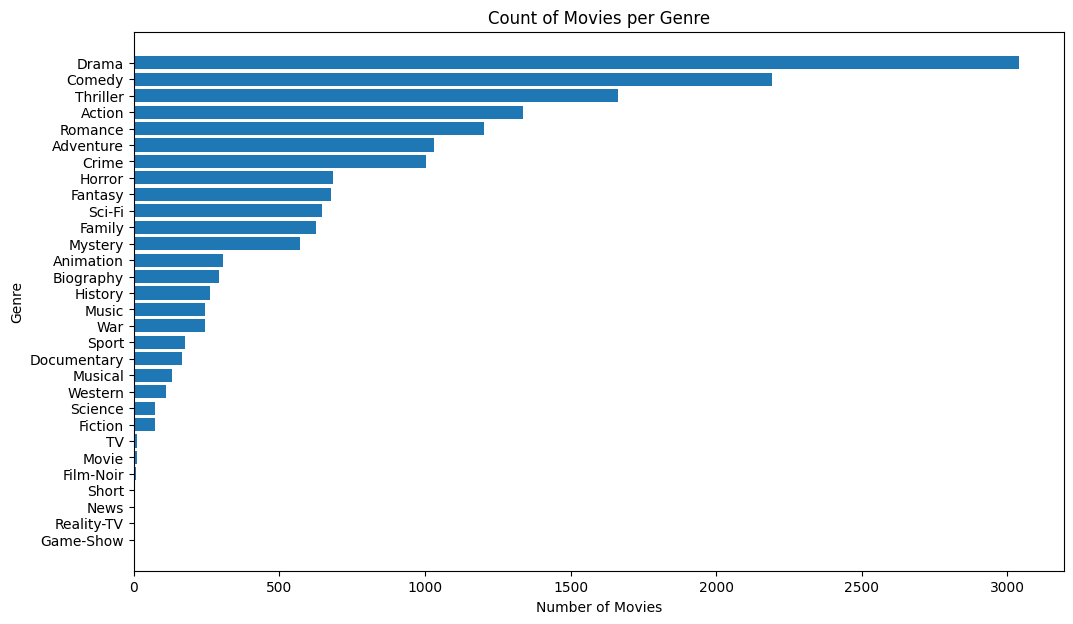

In [13]:
plt.figure(figsize=(12, 7))
plt.barh(genre_df['genre'], genre_df['count'])
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Count of Movies per Genre')
plt.gca().invert_yaxis() 
plt.show()

## Insights:

- <h3>Most Frequent Genre:</h3> <br> 1. Action <br><br> 2. Adventure

## 4.2 Top 10 Actors (Actor_1)

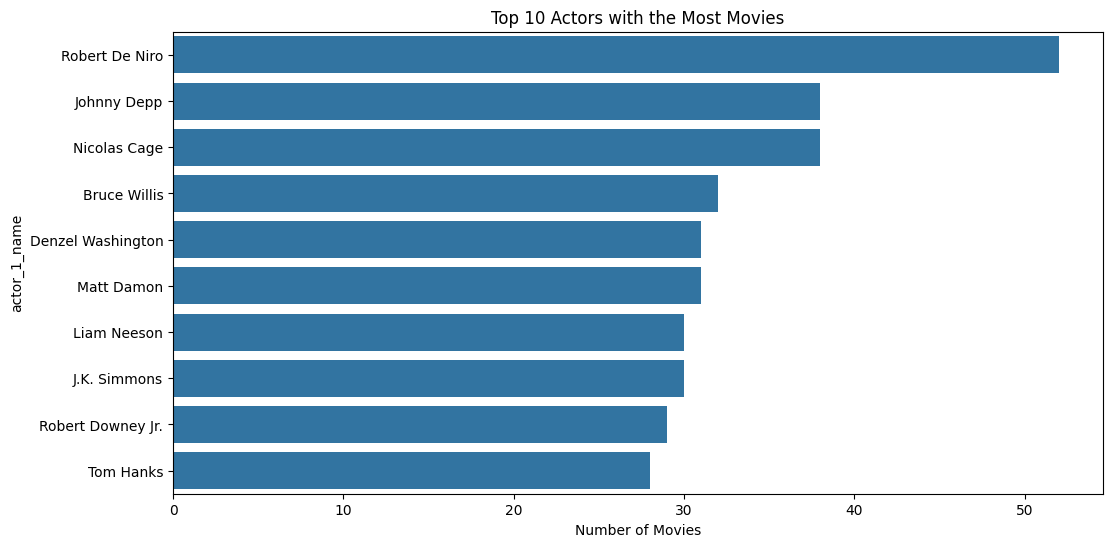

In [14]:
top_actors = df['actor_1_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Number of Movies')
plt.show()

## Insights:

- Top 1 Actor: Robert De Niro
    

## 4.3 Top 10 Genres

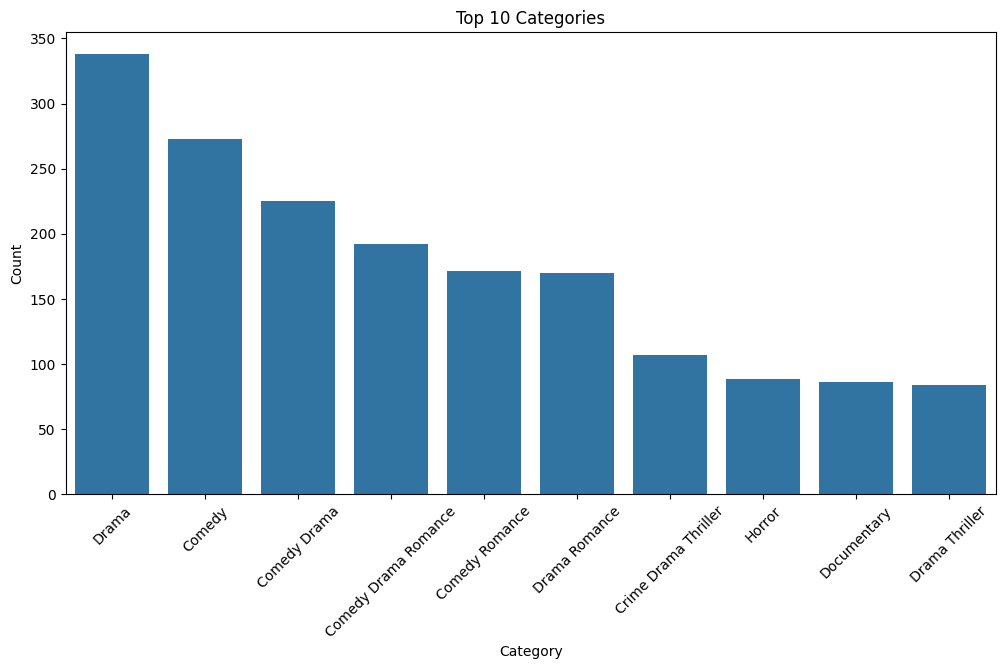

In [15]:
top_categories = df['genres'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title(f'Top {10} Categories')
plt.show()

## Insights: 


- Drama Alone is Most Frequent Genre    

## 4.4 Top Directors 

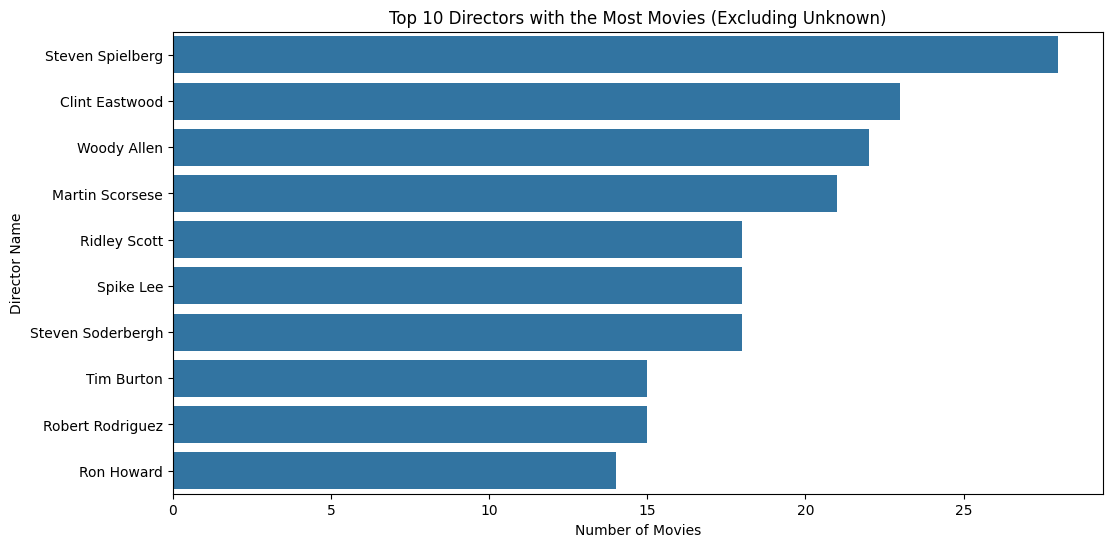

In [16]:
filtered_df = df[df['director_name'] != 'unknown']
top_directors = filtered_df['director_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.xlabel('Number of Movies')
plt.ylabel('Director Name')
plt.title(f'Top {10} Directors with the Most Movies (Excluding Unknown)')
plt.show()

## Insights:

- Steven Speilberg, The Director With most Movies

## 4.5 Movie Titles Word Cloud - Word Cloud

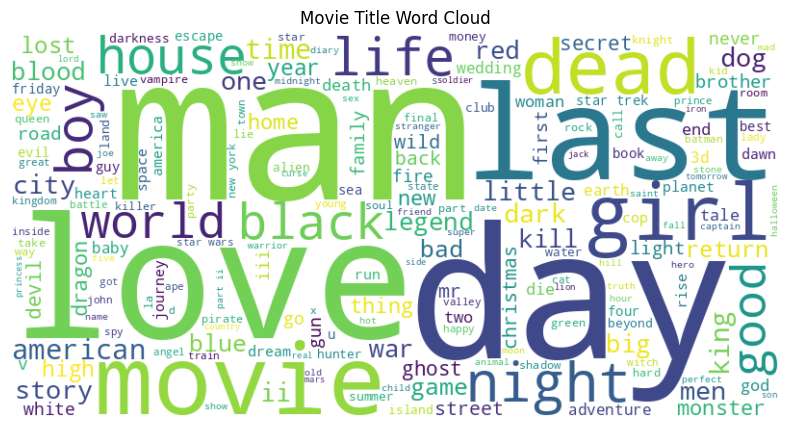

In [17]:
from wordcloud import WordCloud

wordcloud_text = ' '.join(df['movie_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Title Word Cloud')
plt.show()

## Insights:

- Most Frequently Used Words: Love, Last, Man, Day

## 4.6 Distribution of Categorical and Numerical Features

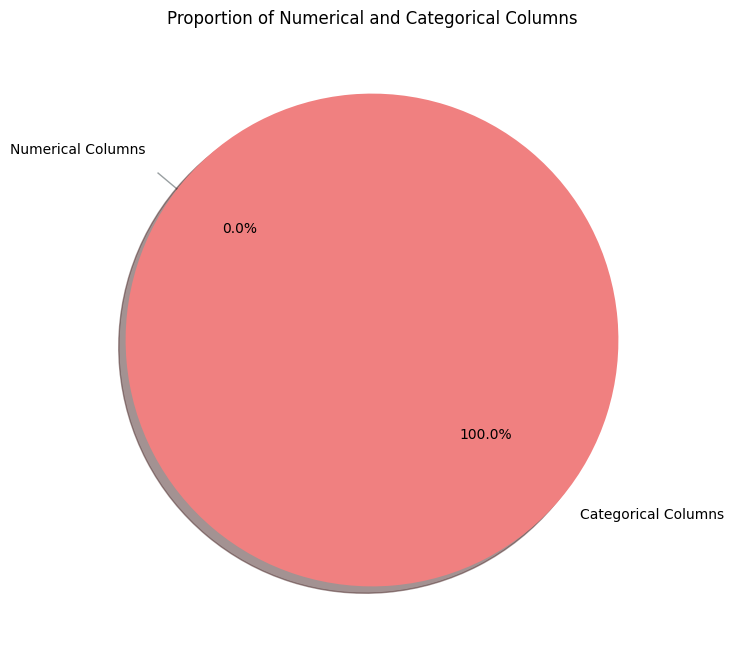

In [18]:
num_numerical_columns = len(numeric_features)
num_categorical_columns = len(categorical_features)

labels = ['Numerical Columns', 'Categorical Columns']
sizes = [num_numerical_columns, num_categorical_columns]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Numerical and Categorical Columns')
plt.show()

## Insights:

- All are Categorical Attributes Only

## 4.7 Director-Actor Collaborations by Number of Movies

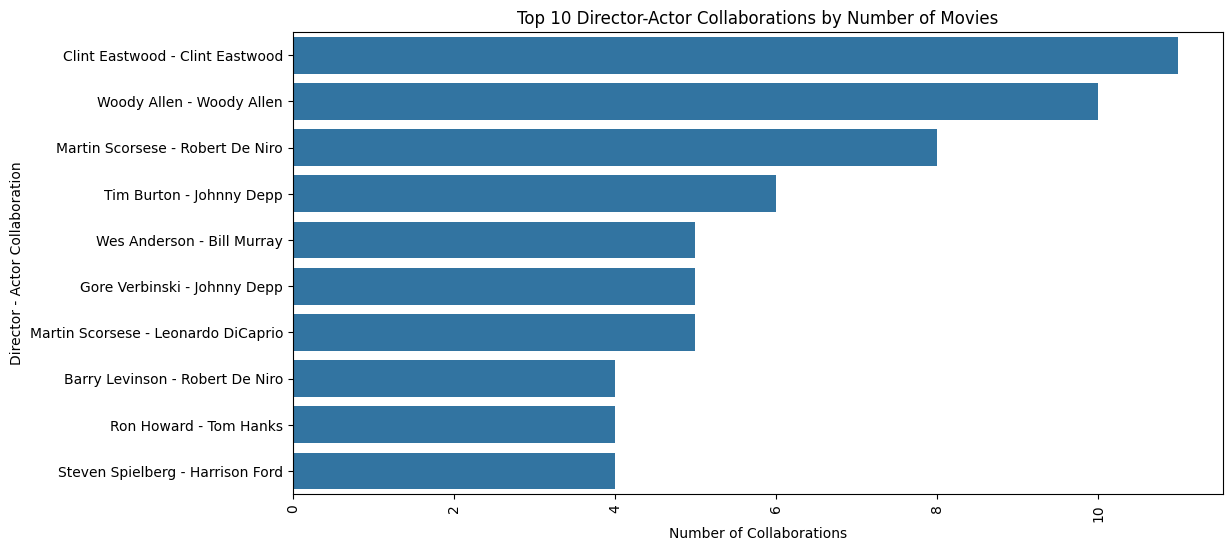

In [19]:
df['director_actor_collaboration'] = df['director_name'] + ' - ' + df['actor_1_name']
collaboration_counts = df['director_actor_collaboration'].value_counts()
top_10_collaborations = collaboration_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_collaborations.values, y=top_10_collaborations.index)
plt.xlabel('Number of Collaborations')
plt.ylabel('Director - Actor Collaboration')
plt.title('Top 10 Director-Actor Collaborations by Number of Movies')
plt.xticks(rotation=90)
plt.show()

## Insights:

- Most Collaborated Director and Actor: Clint EastWood

## 4.8 Actor-Genre Relationships

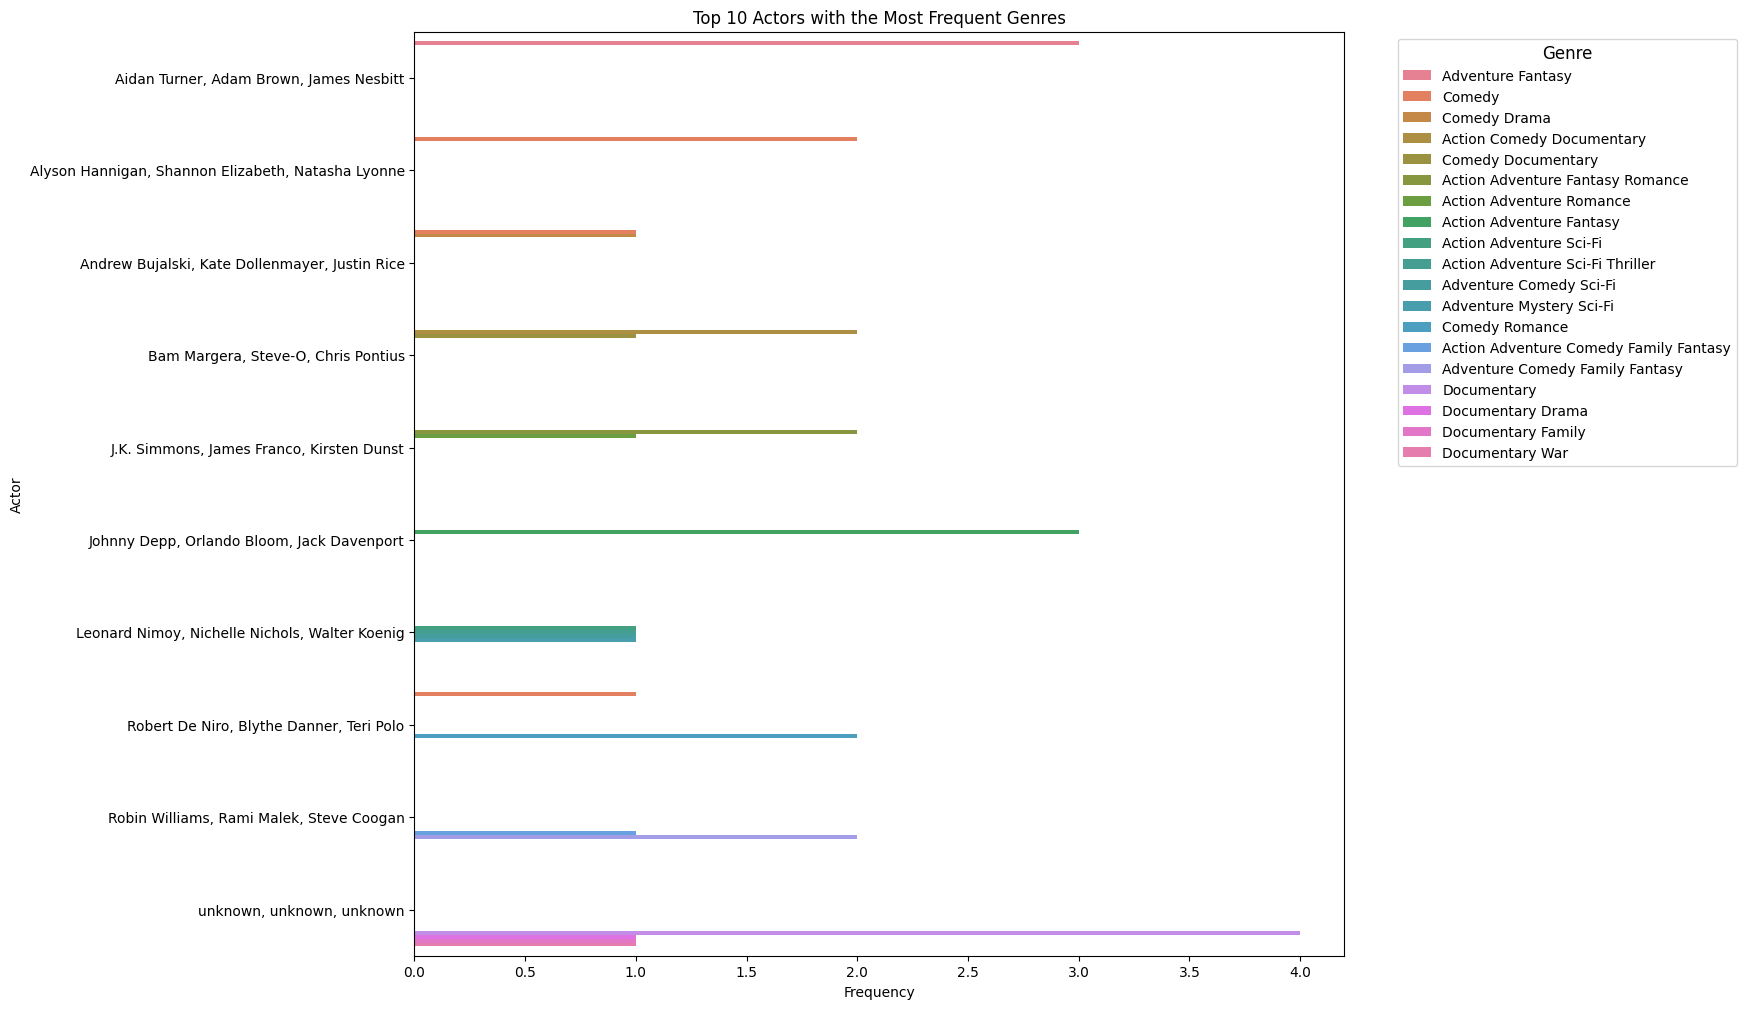

In [20]:
actor_columns = ['actor_1_name', 'actor_2_name', 'actor_3_name']
df['actors'] = df[actor_columns].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

# Split the genres and create a new DataFrame with one row per genre-actor pair
genre_actor_df = df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genre_actor_df = pd.concat([genre_actor_df, df['actors']], axis=1)

# Count the occurrences of each Actor-Genre combination
actor_genre_counts = genre_actor_df.groupby(['actors', 'genre']).size().reset_index(name='count')

# Find the top 10 actors who appeared in the most frequent genres
top_10_actors = actor_genre_counts.groupby('actors')['count'].sum().nlargest(10).index

# Create a count plot to visualize the top 10 actors who played the most frequent genres
plt.figure(figsize=(12, 12))
sns.barplot(x='count', y='actors', hue='genre', data=actor_genre_counts[actor_genre_counts['actors'].isin(top_10_actors)])
plt.title('Top 10 Actors with the Most Frequent Genres')
plt.xlabel('Frequency')
plt.ylabel('Actor')
plt.legend(title='Genre', title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Insights:


- Most Frequent Actor-Genre Relationship: Johnny Deep, Orlando Bloom, Jack Davenport - Action Adventure Fantasy